# Logistic Regression

Just when we thought we were done with regression, it pulls us back in!

To get an idea of how this algorithm works we'll look at some phony classification data. In the next notebook you'll use logistic regression to build a cancer classifier.

## What You'll Accomplish
<ul>
    <li>We'll introduce the logistic regression algorithm,</li>
    <li>Talk about classification cutoffs,</li>
    <li>Introduce additional classification performance measures,</li>
    <li>Show how you can interpret logistic regression output.</li>
</ul>

## The Algorithm

We'll be using logistic regression for binary classification, classification problems with only two classes typically coded as $0$ or $1$. Normally the class denoted as $1$ is something we want to identify, for example someone that has a disease or someone that qualifies for a loan. 

<i>Note that logistic regression can be adapted for more than two classes, but for now we'll only focus on two.</i>

#### From Binary to Continuous
Logistic regression is a form of regression algorithm. Remember that regression algorithms are usually used to predict continuous outcomes, but binary classification is in no way continuous. This is where logisitic regression is a little clever, instead of modeling the output class, it models the probability that a particular data point is an instance of class $1$.

Let's dive in with some fake data. 

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
# Load in the randomly generated data
data = np.loadtxt("random_binary.csv",delimiter = ",")
X = data[:,0]
y = data[:,1]

In [3]:
# Perform a stratified test train split
# Practice, write the code to do that in these two blocks
# First import the package
from sklearn.model_selection import train_test_split

In [4]:
# Now split the data
# Have 20% for testing
# Set 614 as the random state
# and stratify the split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .2,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

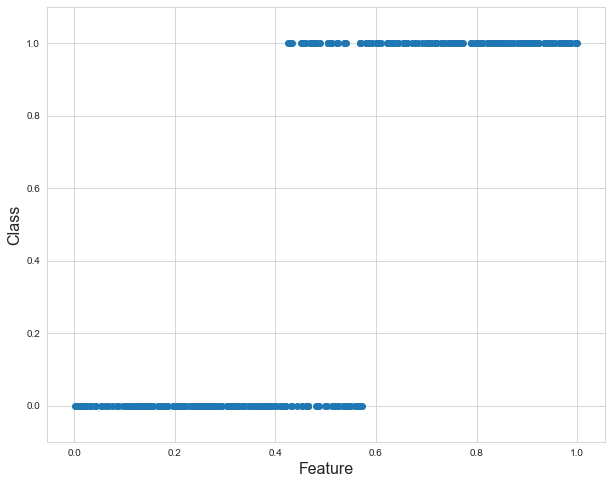

In [5]:
# Plot the training data
plt.figure(figsize = (10,8))

plt.scatter(X_train,y_train)
plt.ylim((-.1,1.1))
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("Class",fontsize = 16)

plt.show()

Now let's get down to the idea behind logistic regression. While the $y$-axis of the above plot says Class we could just as easily label it the Probability the instance is $1$. In this case since we know the class of each data point in the training set, the probability can only be $0$ or $1$. Now suppose you have a new data point for which you only have the vector of predictors, $X$. We're interested in the probability that this data point has class $y=1$, call this probability $P(y=1|X) = p(X)$. $p(X)$ can take on all values in $[0,1]$, this is a continuous variable.

The way we model the probability in logistic regression is with a sigmoidal curve, the general form looks like this:
$$
f(x) = \frac{1}{1+e^{-x}}.
$$
A graph of the curve this function produces is shown below.

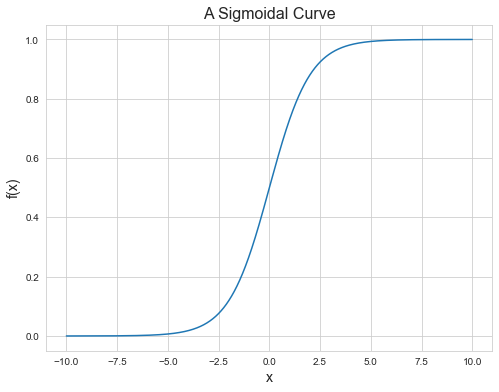

In [6]:
x = 10

plt.figure(figsize = (8,6))

plt.plot(np.arange(-x,x,.01),1/(1+np.exp(-np.arange(-x,x,.01))))


plt.xlabel("x",fontsize = 14)
plt.ylabel("f(x)",fontsize = 14)

plt.title("A Sigmoidal Curve", fontsize=16)

plt.show()

Notice that this function stays between $0$ and $1$. Also like our phony data data it transitions from class $0$, to class $1$ in a continuous manner. This is the function type we'd like to use as our model.

The model that is used in logistic regression is:
$$
p(X) = \frac{1}{1 + e^{-X\beta}},
$$
where $\beta = \left(\beta_0,\beta_1,\dots,\beta_m\right)^T$ is a column vector of coefficients, $X$ has been extended to include a column of ones, and by multiplication we mean the standard vector dot product.

The model is fit using the statistical method of maximum likelihood estimators (for a derivation of the loss function see the homework on logistic regression).

Let's see how to use `sklearn` to fit a logistic regression model to our phony data, then see how we can use it for classification.

## Practice 

You'll make and fit the Logistic Regression model below for our phony data.

The procedure follows the standard `sklearn` pattern for fitting and predicting a model. If you need more help check out the docs, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html</a>.

In [7]:
# import the logistic regression method
from sklearn.linear_model import LogisticRegression

In [9]:
# Practice!
# Make a model instance here
log_reg = LogisticRegression()

In [19]:
# Practice!
# Fit the model here
log_reg.fit(X_train.reshape(-1,1),y_train)

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now that we've fit the model to our training data, let's plot the model along with our train data, and see what we're talking about.

Text(0, 0.5, 'p(X)')

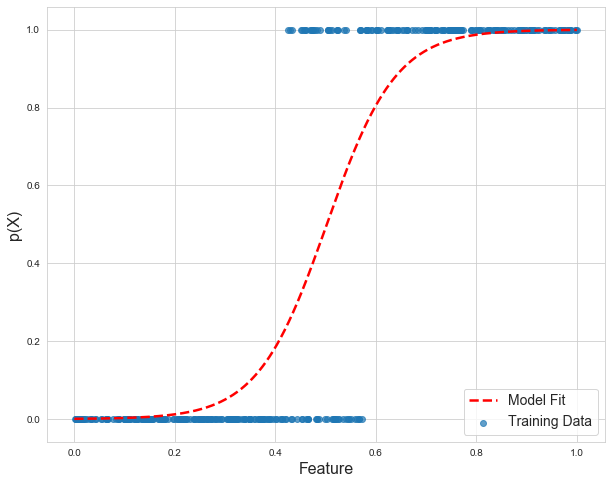

In [20]:
# Plot figure 
plt.figure(figsize = (10,8))

# With classifications we have a new method
# predict_proba which returns the probability
# that an observation is a certain class.
plt.plot(np.linspace(0,1,1000),
            log_reg.predict_proba(np.linspace(-.5,1.5,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("p(X)",fontsize=16) 

The dotted red line shows how the logistic regression model fit on our training data changes the probability of being and instance of the $1$ class as we increase the value for our feature. 

### From Probabilities to Classifications

How would you propose we turn probability output into classifications?


The standard approach is to just choose a probability cutoff, for instance if $p(X) \geq .5$ we classify the instance as $1$, otherwise we say it is a $0$. This is an example of a <i>decision boundary</i>, any point to the left of the boundary gets classified as a $0$, on the right a $1$. Decision boundaries are a big part of many classification algorithms, so this won't be the last time we see them.

Let's see what our training accuracy is for a cutoff of your choice.

In [25]:
# Write code to calculate the accuracy for any cutoff, then choose your cutoff
cutoff = .476

# store the predicted probabilities
y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

# assign the value based on the cutoff
y_train_pred = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

# print the accuracy
# input the accuracy after "is",
print("The accuracy for a cutoff of",cutoff,
      "is",)

The accuracy for a cutoff of 0.476 is


In [22]:
# Now plot how the accuracy changes with the cutoff
cutoffs = np.linspace(0,1,100)

accs = []

for cutoff in cutoffs:
    y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]
    y = 1*(y_prob >= cutoff)
    
    accs.append(sum(y == y_train)/len(y))

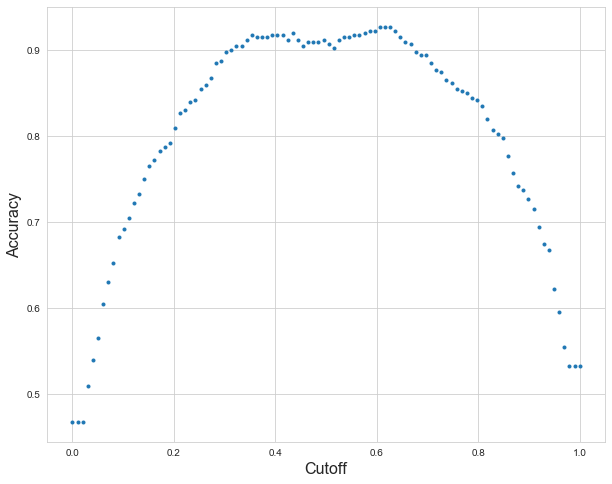

In [23]:
plt.figure(figsize = (10,8))

plt.xlabel("Cutoff",fontsize = 16)
plt.ylabel("Accuracy",fontsize = 16)

plt.plot(cutoffs,accs,'.')

plt.show()

## End Practice

### Accuracy Isn't Everything

As we did with knn we could use cross validation to decide on the best cutoff based on the average accuracy over the splits. That may work for this toy set, but sometimes accuracy is a misleading measure. With our dataset about $45\%$ of the data are $0$ and $55\%$ are $1$. What if it was a more extreme split, say $90\%$ in class $0$ and $10\%$ in class $1$. In that instance we could build a $90\%$ accurate classifier by just labeling everything as $0$. However, we didn't correctly identify any of the class $1$ objects. This would be awful, if for instance class $1$ represented a person that has a disease, for instance COVID19.

So it may be important to look at some alternative performance measures.

#### Now Things Start To Get Confusing

Additional performance measures are derived from the confusion matrix, pictured below.

<img src="conf_mat.jpg" alt="Confusion Matrix Image" style="width:400px;">




Here the diagonal of the box represents data points that were correctly predicted by the algorithm, the off-diagonal represents points that are incorrectly predicted by the algorithm. Contained within each box of the confusion matrix are counts of how the algorithm sorted. For instance, in the TP box would be the total number of correct positive (correctly classified as $1$) classifications the algorithm made.

Two popular measures derived from the confusion matrix are the algorithm's <i>precision</i> and <i>recall</i>:

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \text{ out of all points predicted to be class } 1, \text{ what fraction were actually class } 1.
$$
$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \text{ out of all the actual data points in class } 1 \text{, what fraction did the algorithm correctly predict?}
$$

You can think of precision as how much you should trust the algorithm when it says something is class $1$. Recall estimates the probability that the algorithm correctly detects class $1$ data points.

You've likely heard of these types of measures in all the news stories about COVID19 tests.

Let's examine the training precision and recall for our algorithm if we use the $0.5$ cutoff.

In [26]:
# Calculate the precision and recall here
y_train_pred = 1*(y_prob >= 0.5)

tp_train = np.sum(((y_train_pred == 1) & (y_train == 1)))
fp_train = np.sum(((y_train_pred == 1) & (y_train == 0)))
fn_train = np.sum(((y_train_pred == 0) & (y_train == 1)))
tn_train = np.sum(((y_train_pred == 0) & (y_train == 0)))

print("The precision is " + str(np.round((tp_train/(tp_train + fp_train)),2)))
print("The recall is " + str(np.round((tp_train/(tp_train + fn_train)),2)))

The precision is 0.9
The recall is 0.91


These are pretty good. We should expect to be able to get decent recall and precision for this data set because it is well balanced between the two classes, and they are pretty well separated by the feature. In general classification algorithms have a precision-recall tradeoff, when you increase precision you tend to decrease recall and vice-versa. In the homework you'll examine this tradeoff.

### The ROC Curve

Another way to measure the performance of your classifier is the <i>receiver operating characteristic</i> (ROC) curve.

This plots the <i>true positive rate</i> (tpr), i.e. the recall, vs the <i>false positive rate</i> (fpr). Returning to the confusion matrix the fpr is:
$$
\text{fpr} = \frac{\text{FP}}{\text{FP}+\text{TN}} = 1 - \frac{\text{TN}}{\text{FP} + \text{TN}} = 1 - \text{specificity},
$$
specifity is a term used a lot in public health and is another name for true negative rate. Public Health so hot right now.

Let's plot an ROC curve for our logistic regression model.

In [27]:
# import the function from sklearn
# this function is very nice for making roc 
# curves
from sklearn.metrics import roc_curve

In [28]:
# calculate fpr and tpr
# you put in the training data
# and the predicted probabilites
# it returns the fpr, tpr, and corresponding
# cutoffs
fpr, tpr, cutoffs = roc_curve(y_train,y_prob)

Text(0, 0.5, 'True Positive Rate')

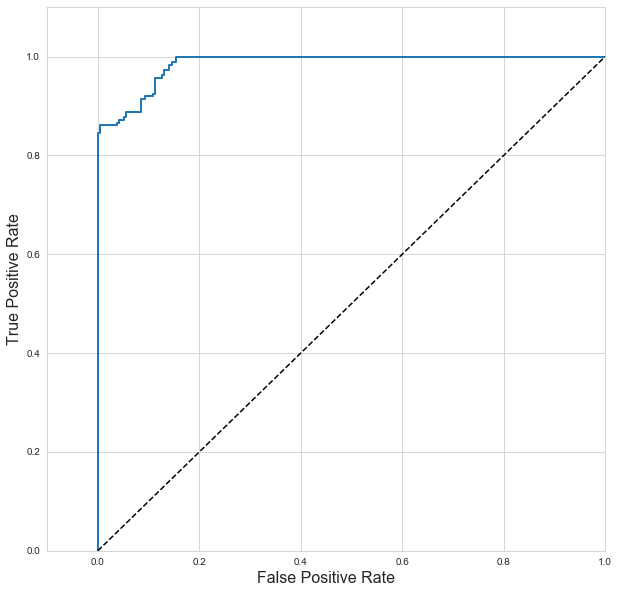

In [29]:
# plot the roc curve
plt.figure(figsize=(10,10))

# plot the curve
plt.plot(fpr,tpr,linewidth=2)

# plot what you'd get with random guessing
plt.plot([0,1],[0,1],'k--')

plt.axis([-0.1,1,0,1.1])

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

How was the ROC curve made? The `roc_curve` function went through and calculated the true and false positive rates that resulted from various cutoffs (these cutoffs are stored in `cutoffs` in the above code).

#### AUC

ROC curves come with an additional measure called AUC (area under the curve). An AUC of $1$ would be a perfect classifer, an AUC of $.5$ is what you'd get with random guessing. So what is a good AUC? well it's hard to say with a single classifier, but it can be used to compare multiple classifiers, for example if you're choosing between a classifier with AUC $.8$ and an AUC of $.85$ you'd go with the one that has AUC $.85$.

Let's see how to calculate AUC with `sklearn`.

In [ ]:
# import the function from sklearn
from sklearn.metrics import roc_auc_score

In [ ]:
# put in the true classes along with the 
# probability scores.
roc_auc_score(y_train,y_prob)

Now let's dive back into logistic regression specific material.

## Interpreting Logistic Regression

One nice thing about this algorithm is that we can interpret the results. This is always a nice feature of an algorithm.

Reconsider the statistical model that we fit:
$$
p(X) = \frac{1}{1 + e^{- X \beta}}.
$$
Rearranging this equation we find the following:
$$
\log\left(\frac{p(X)}{1-p(X)}\right) =  X \beta.
$$
The expression $p(X)/(1-p(X))$ is known as the odds of the event $y=1$. So the statistical model for logistic regression is really just a linear model for the $\log$ odds of being class $1$. This allows us to interpret the coefficients of our model.

Look at the model we just fit:
$$
\log\left(\frac{p(x)}{1-p(x)}\right) = \beta_0 + \beta_1 x, \text{ or } \text{Odds}|x = C e^{\beta_1 x}
$$
where $x$ is the feature, and $C$ is some constant we don't care about. 

So if we increase $x$ from say $d$ to $d+1$, a $1$ unit increase, then our odds are $e^{\beta_1}$ units times larger (or smaller depending on the value of $\beta_1$), we can see this below:
$$
\frac{\text{Odds}|x = d+1}{\text{Odds}|x=d} = \frac{e^{\beta_1 (d+1)}}{e^{\beta_1 d}} = e^{\beta_1}
$$

Let's look at the coefficient from our phony data logistic regression and interpret it.

In [ ]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

This is a nice feature because it allows us to better understand the algorithm, which in turn enables data scientists to communicate with their clients what the algorithm is actually doing.

### Before You Go

While we were explaining the concept of logistic regression, we didn't mention any of the assumptions of the algorithm. Let's talk about that here before we move on to real data.
<ol>
    <li>Each sample must be independent from all other samples,</li>
    <li>When using multiple predictors, they shouldn't be correlated,</li>
    <li>The log odds depend linearly on the predictors,</li>
    <li>Logistic regression should have a largish data set to work with.</li>
</ol>

We did not worry about these assumptions in this notebook because the data were randomly generated to fit these assumptions. However, in real world applications you should check them when deciding whether or not logistic regression is a good model choice. 



